In [1]:
%matplotlib inline
import numpy as np
import requests
from bs4 import BeautifulSoup
import os
import pandas as pd
import time
import re
import seaborn as sns
from lxml import html
import matplotlib.pyplot as plt


%config InlineBackend.figure_format = 'svg'
from pylab import rcParams
rcParams['figure.figsize'] = 8, 5

Получаем 250 самых топовых фильмов

In [2]:
url = 'http://www.imdb.com/chart/top'
response = requests.get(url)
soup = BeautifulSoup(response.text, 'lxml')

Парсим страницу с фильмами и получаем грязные данные с


1.   Названием фильма
2.   Рейтингом
3.   Командой 
4.   Ссылкой на основную страницу




In [3]:
movies = soup.select('td.titleColumn')
links = [a.attrs.get('href') for a in soup.select('td.titleColumn a')]
crew = [a.attrs.get('title') for a in soup.select('td.titleColumn a')]
ratings = [b.attrs.get('data-value') for b in soup.select('td.posterColumn span[name=ir]')]

In [4]:
data_frame = {
    "movies": movies,
    "ratings": ratings,
    "crew": crew,
    "links": links
}

data = pd.DataFrame(data_frame)
data

,movies,ratings,crew,links
0,"[\n 1.\n , [Побег из Шоушенка], \n, ...",9.235295940066258,"Frank Darabont (dir.), Tim Robbins, Morgan Fre...",/title/tt0111161/
1,"[\n 2.\n , [Крёстный отец], \n, [(19...",9.156156342012096,"Francis Ford Coppola (dir.), Marlon Brando, Al...",/title/tt0068646/
2,"[\n 3.\n , [Темный рыцарь], \n, [(20...",8.989600809037029,"Christopher Nolan (dir.), Christian Bale, Heat...",/title/tt0468569/
3,"[\n 4.\n , [Крёстный отец 2], \n, [(...",8.984051684475633,"Francis Ford Coppola (dir.), Al Pacino, Robert...",/title/tt0071562/
4,"[\n 5.\n , [12 рaзгневанных мужчин],...",8.951099637812517,"Sidney Lumet (dir.), Henry Fonda, Lee J. Cobb",/title/tt0050083/
...,...,...,...,...
245,"[\n 246.\n , [Дерсу Узала], \n, [(19...",8.006506967724938,"Akira Kurosawa (dir.), Maksim Munzuk, Yuriy So...",/title/tt0071411/
246,"[\n 247.\n , [Стальной гигант], \n, ...",8.005097695175513,"Brad Bird (dir.), Eli Marienthal, Harry Connic...",/title/tt0129167/
247,"[\n 248.\n , [Прислуга], \n, [(2011)...",8.005001176467113,"Tate Taylor (dir.), Viola Davis, Emma Stone",/title/tt1454029/
248,"[\n 249.\n , [Аладдин], \n, [(1992)]...",8.00499381869741,"Ron Clements (dir.), Scott Weinger, Robin Will...",/title/tt0103639/


Несколько функциий для преобзразования грязных заголовков с названием фильмов


In [5]:
def process_text_mv(text):
    data = text.get_text().split("\n")
    return data[2].strip()

In [6]:
def process_text_year(text):
    data = text.get_text().split("\n")
    return data[3].strip()[1:-1]

In [7]:
data["title"] = data.movies.apply(process_text_mv)
data["year"] = data.movies.apply(process_text_year)

In [8]:
data.head()

,movies,ratings,crew,links,title,year
0,"[\n 1.\n , [Побег из Шоушенка], \n, ...",9.235295940066258,"Frank Darabont (dir.), Tim Robbins, Morgan Fre...",/title/tt0111161/,Побег из Шоушенка,1994
1,"[\n 2.\n , [Крёстный отец], \n, [(19...",9.156156342012096,"Francis Ford Coppola (dir.), Marlon Brando, Al...",/title/tt0068646/,Крёстный отец,1972
2,"[\n 3.\n , [Темный рыцарь], \n, [(20...",8.989600809037029,"Christopher Nolan (dir.), Christian Bale, Heat...",/title/tt0468569/,Темный рыцарь,2008
3,"[\n 4.\n , [Крёстный отец 2], \n, [(...",8.984051684475633,"Francis Ford Coppola (dir.), Al Pacino, Robert...",/title/tt0071562/,Крёстный отец 2,1974
4,"[\n 5.\n , [12 рaзгневанных мужчин],...",8.951099637812517,"Sidney Lumet (dir.), Henry Fonda, Lee J. Cobb",/title/tt0050083/,12 рaзгневанных мужчин,1957


## Задача 1

Задача 1.
Получить список всех участников команд (убрать постфикс `(dir.)` у директоров). Найти количество уникальных имен. 


In [9]:
data_dir = data.copy()

In [10]:
data['crew'] = data['crew'].str.replace('\(dir.\)', '').str.strip()

C:\Users\Eкатерина Захарова\AppData\Local\Temp\ipykernel_6392\876482113.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  data['crew'] = data['crew'].str.replace('\(dir.\)', '').str.strip()


In [11]:
data.crew[1]

'Francis Ford Coppola , Marlon Brando, Al Pacino'

In [12]:
data_dir.crew[1]

'Francis Ford Coppola (dir.), Marlon Brando, Al Pacino'

In [13]:
unique_list = []

for row in data.crew:
    for item in row.split(','):
        if item.strip() not in unique_list:
            unique_list.append(item.strip())

print(unique_list)
print(len(unique_list))

['Frank Darabont', 'Tim Robbins', 'Morgan Freeman', 'Francis Ford Coppola', 'Marlon Brando', 'Al Pacino', 'Christopher Nolan', 'Christian Bale', 'Heath Ledger', 'Robert De Niro', 'Sidney Lumet', 'Henry Fonda', 'Lee J. Cobb', 'Steven Spielberg', 'Liam Neeson', 'Ralph Fiennes', 'Peter Jackson', 'Elijah Wood', 'Viggo Mortensen', 'Quentin Tarantino', 'John Travolta', 'Uma Thurman', 'Ian McKellen', 'Sergio Leone', 'Clint Eastwood', 'Eli Wallach', 'Robert Zemeckis', 'Tom Hanks', 'Robin Wright', 'David Fincher', 'Brad Pitt', 'Edward Norton', 'Leonardo DiCaprio', 'Joseph Gordon-Levitt', 'Irvin Kershner', 'Mark Hamill', 'Harrison Ford', 'Lana Wachowski', 'Keanu Reeves', 'Laurence Fishburne', 'Martin Scorsese', 'Ray Liotta', 'Milos Forman', 'Jack Nicholson', 'Louise Fletcher', 'Akira Kurosawa', 'Toshirô Mifune', 'Takashi Shimura', 'Frank Capra', 'James Stewart', 'Donna Reed', 'Jonathan Demme', 'Jodie Foster', 'Anthony Hopkins', 'Fernando Meirelles', 'Alexandre Rodrigues', 'Leandro Firmino', 'Mat

## Задача 2

Задача 2.
Получить список всех директоров. Построить распределение (визуализация обязательна) и найти директора(ов), у которого(ых) больше всего фильмов в топе.

In [14]:
directors_list = []

for i in data_dir['crew']:
    crew_list = i.split(',')
    for j in crew_list:
        if ' (dir.)' in j:
            directors_list.append(j.replace(' (dir.)', ''))
            
print('\nDirectors list:', directors_list)


Directors list: ['Frank Darabont', 'Francis Ford Coppola', 'Christopher Nolan', 'Francis Ford Coppola', 'Sidney Lumet', 'Steven Spielberg', 'Peter Jackson', 'Quentin Tarantino', 'Peter Jackson', 'Sergio Leone', 'Robert Zemeckis', 'David Fincher', 'Peter Jackson', 'Christopher Nolan', 'Irvin Kershner', 'Lana Wachowski', 'Martin Scorsese', 'Milos Forman', 'David Fincher', 'Akira Kurosawa', 'Frank Capra', 'Jonathan Demme', 'Fernando Meirelles', 'Steven Spielberg', 'Roberto Benigni', 'Christopher Nolan', 'Frank Darabont', 'George Lucas', 'James Cameron', 'Robert Zemeckis', 'Hayao Miyazaki', 'Alfred Hitchcock', 'Roman Polanski', 'Bong Joon Ho', 'Luc Besson', 'Roger Allers', 'Ridley Scott', 'Tony Kaye', 'Martin Scorsese', 'Bryan Singer', 'Christopher Nolan', 'Damien Chazelle', 'Michael Curtiz', 'Masaki Kobayashi', 'Isao Takahata', 'Olivier Nakache', 'Charles Chaplin', 'Sergio Leone', 'Alfred Hitchcock', 'Giuseppe Tornatore', 'Ridley Scott', 'Charles Chaplin', 'Francis Ford Coppola', 'Christ

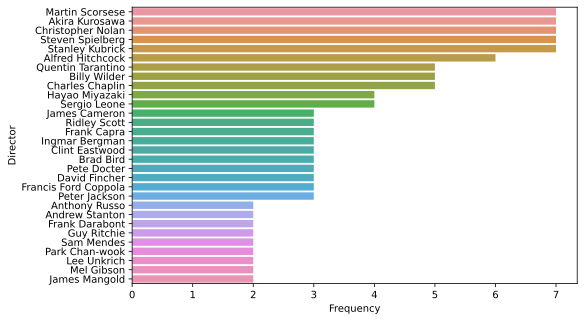

In [15]:
directors_dict = {}
for director in directors_list:
    if director in directors_dict:
        directors_dict[director] += 1
    else:
        directors_dict[director] = 1

directors_df = pd.DataFrame([directors_dict]).T.reset_index()
directors_df.columns = ['Director', 'Frequency']

directors_top20 = directors_df.sort_values(by='Frequency', ascending=False).head(30)

sns.barplot(x='Frequency', y='Director', data=directors_top20, order=directors_top20.Director);

## Задача 3

Задача 3. Найти участника(ов) команд, у которого(ых) больше всего фильмов в топе.

In [16]:
data_dir['crew'] = data_dir['crew'].apply(lambda x: x.split(','))

actors_list = []
for row in data_dir['crew']:
    for name in row:
        if name.find('(dir.)') == -1:
            actors_list.append(name)

actors_dict = {}
for name in actors_list:
    actors_dict[name] = actors_list.count(name)

print(actors_dict)

{' Tim Robbins': 1, ' Morgan Freeman': 2, ' Marlon Brando': 3, ' Al Pacino': 4, ' Christian Bale': 5, ' Heath Ledger': 1, ' Robert De Niro': 9, ' Henry Fonda': 3, ' Lee J. Cobb': 1, ' Liam Neeson': 1, ' Ralph Fiennes': 2, ' Elijah Wood': 3, ' Viggo Mortensen': 2, ' John Travolta': 1, ' Uma Thurman': 2, ' Ian McKellen': 2, ' Clint Eastwood': 5, ' Eli Wallach': 1, ' Tom Hanks': 6, ' Robin Wright': 1, ' Brad Pitt': 4, ' Edward Norton': 2, ' Leonardo DiCaprio': 5, ' Joseph Gordon-Levitt': 1, ' Mark Hamill': 3, ' Harrison Ford': 6, ' Keanu Reeves': 1, ' Laurence Fishburne': 1, ' Ray Liotta': 1, ' Jack Nicholson': 3, ' Louise Fletcher': 1, ' Toshirô Mifune': 4, ' Takashi Shimura': 2, ' James Stewart': 4, ' Donna Reed': 1, ' Jodie Foster': 2, ' Anthony Hopkins': 3, ' Alexandre Rodrigues': 1, ' Leandro Firmino': 1, ' Matt Damon': 4, ' Roberto Benigni': 1, ' Nicoletta Braschi': 1, ' Matthew McConaughey': 1, ' Anne Hathaway': 1, ' Michael Clarke Duncan': 1, ' Arnold Schwarzenegger': 2, ' Linda H

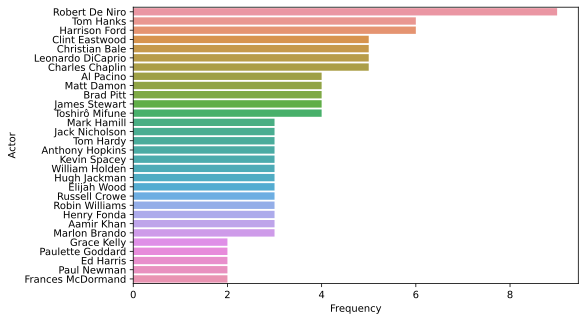

In [17]:
actors_df = pd.DataFrame([actors_dict]).T.reset_index()
actors_df.columns = ['Actor', 'Frequency']

actors_top20 = actors_df.sort_values(by='Frequency', ascending=False).head(30)

sns.barplot(x='Frequency', y='Actor', data=actors_top20, order=actors_top20.Actor);

## Задание 4

Задача 4. Построить распределение топовых фильмов по годам


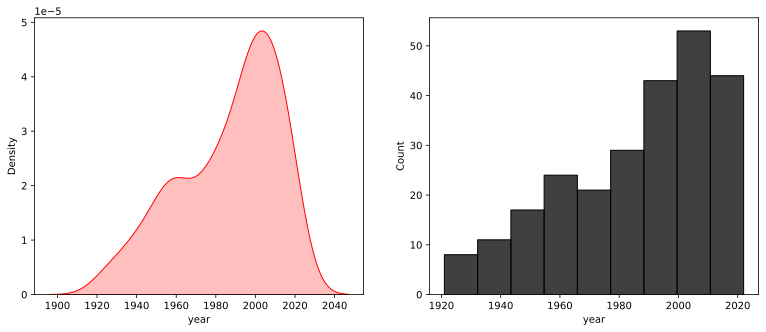

In [18]:
data['year'] = pd.to_datetime(data['year'], format="%Y")
f, axes = plt.subplots(1, 2, figsize=(13, 5))
sns.kdeplot(data['year'], shade=True, color="r", ax=axes[0])
sns.histplot(data['year'],color='black', ax=axes[1])
plt.show();

## Задание 5

Задача 5. Построить распределение топовых фильмов рейтингу:


*   Округлить до сотых и отрисовать
*   Округлить до десятых и отрисовать
*   Округлить до целых и отрисовать

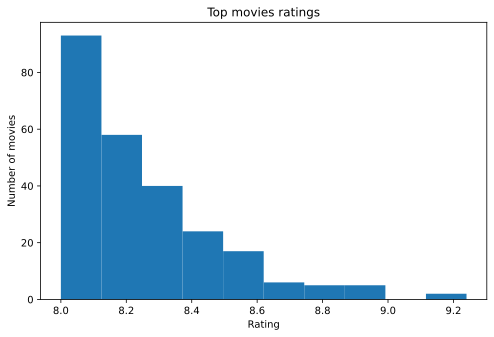

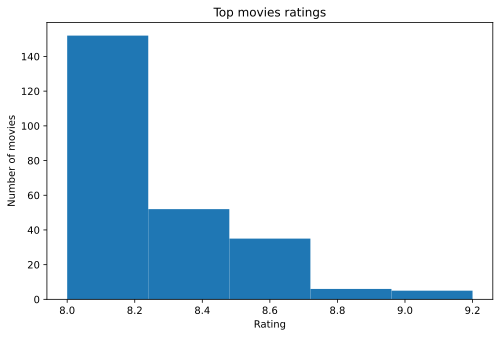

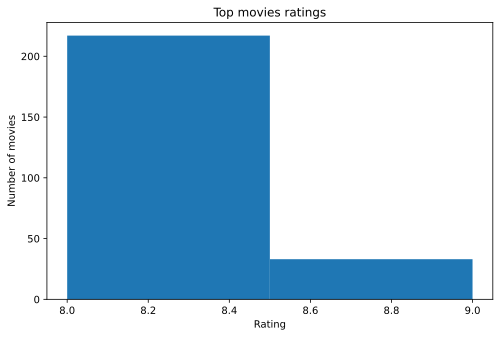

In [19]:
data['ratings']= data['ratings'].astype('float64')

ratings = data['ratings'].round(2)
plt.hist(ratings, bins=10)
plt.title('Top movies ratings')
plt.xlabel('Rating')
plt.ylabel('Number of movies')
plt.show()


ratings = data['ratings'].round(1)
plt.hist(ratings, bins=5)
plt.title('Top movies ratings')
plt.xlabel('Rating')
plt.ylabel('Number of movies')
plt.show()


ratings = data['ratings'].round(0)
plt.hist(ratings, bins=2)
plt.title('Top movies ratings')
plt.xlabel('Rating')
plt.ylabel('Number of movies')
plt.show()

## Задание 6

Задача 6. Используйте ссылку `http://www.imdb.com/` и динамически добавляя ссылку на фильм из колонки `links` соберите описание фильмов. Пример поиска необходимого текст представлен ниже. Добавьте эту информацию в исходный датафрейм.

 ```
 film_url = 'http://www.imdb.com/title/tt0068646/'
 html_text = requests.get(film_url).text
 ```
 ```
soup = BeautifulSoup(html_text, 'lxml')
soup.find_all(attrs={"name": "description"})[0].get("content")
 ```

In [20]:
headers = {'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/83.0.4103.106 Safari/537.36'}
film_urls = data['links'].tolist()
descriptions = []

for film_url in film_urls:
    html_text = requests.get(f'http://www.imdb.com{film_url}', headers=headers).text
    soup = BeautifulSoup(html_text, 'lxml')
    description = soup.find(attrs={"name": "description"}).get("content")
    descriptions.append(description)
    
data['description'] = descriptions

In [21]:
data.head()

,movies,ratings,crew,links,title,year,description
0,"[\n 1.\n , [Побег из Шоушенка], \n, ...",9.235296,"Frank Darabont , Tim Robbins, Morgan Freeman",/title/tt0111161/,Побег из Шоушенка,1994-01-01,Побег из Шоушенка: Directed by Frank Darabont....
1,"[\n 2.\n , [Крёстный отец], \n, [(19...",9.156156,"Francis Ford Coppola , Marlon Brando, Al Pacino",/title/tt0068646/,Крёстный отец,1972-01-01,Крёстный отец: Directed by Francis Ford Coppol...
2,"[\n 3.\n , [Темный рыцарь], \n, [(20...",8.989601,"Christopher Nolan , Christian Bale, Heath Ledger",/title/tt0468569/,Темный рыцарь,2008-01-01,Темный рыцарь: Directed by Christopher Nolan. ...
3,"[\n 4.\n , [Крёстный отец 2], \n, [(...",8.984052,"Francis Ford Coppola , Al Pacino, Robert De Niro",/title/tt0071562/,Крёстный отец 2,1974-01-01,Крёстный отец 2: Directed by Francis Ford Copp...
4,"[\n 5.\n , [12 рaзгневанных мужчин],...",8.951100,"Sidney Lumet , Henry Fonda, Lee J. Cobb",/title/tt0050083/,12 рaзгневанных мужчин,1957-01-01,12 рaзгневанных мужчин: Directed by Sidney Lum...


## Задание 7


Задача 7. С помощью регулярных выражений найдите в текстах описания фильмов имена актеров, если это возможно (то есть - они там упоминаются). Добавьте эту информацию в датафрейм и посчитайте, для скольких фильмов получилось это сдлеать. Подсказка: перечисление актеров иногда начинается с with. 

In [22]:
actors = []
actors_count = []


for row in data['description']:
    actors_list = re.findall("(?:with|starring)\s(?:[A-z-]+(?:\s[A-z-]+)*)", row)
    if actors_list:
        actors.append(actors_list)
        actors_count.append(len(actors_list))
    else:
        actors.append('')
        actors_count.append('')

data['actors'] = actors
data['actors_count'] = actors_count

actors_films_count = 0
for row in data['actors']:
    if row:
        actors_films_count += 1

print(f'Количество фильмов с упоминанием имен актеров: {actors_films_count}')

Количество фильмов с упоминанием имен актеров: 52


## Задание 8




Задача 8. Распарсите исходную страницу с топ-250 фильмов и получите для каждого фильмов количество оценок. Пример текста в исходной странице:`9.2 based on 2,554,919 user ratings`. Из этого текста нужно достать = `2,554,919`. Подсказка: используя метод `find_all` с аргументом `attrs` в который нужно передать `{'class': 'ratingColumn imdbRating'}` от страници `http://www.imdb.com/chart/top`. Найдите 10 фильмов (вывести их название и кол-во оценок) у которых, самое большое количество оценок.



In [23]:
url = 'http://www.imdb.com/chart/top'
response = requests.get(url)
soup = BeautifulSoup(response.text, 'lxml')

movies = soup.find_all('td', class_ = 'titleColumn')
ratings = soup.find_all('td', class_ = 'ratingColumn imdbRating')

movie_ratings = []

for movie, rating in zip(movies, ratings):
    title = movie.find('a').get_text()
    votes = rating.find('strong')['title']
    movie_ratings.append((title, float(votes.split(' ')[0]), int(votes.split(' ')[3].replace(',', ''))))

movie_ratings.sort(key=lambda x: x[2], reverse=True)

for i in range(10):
    print(movie_ratings[i][0], movie_ratings[i][1], movie_ratings[i][2])

Побег из Шоушенка 9.2 2672206
Темный рыцарь 9.0 2645058
Начало 8.7 2344547
Бойцовский клуб 8.7 2117637
Форрест Гамп 8.8 2072126
Криминальное чтиво 8.8 2047201
Матрица 8.7 1908650
Властелин колец: Братство кольца 8.8 1870856
Крёстный отец 9.2 1851981
Властелин колец: Возвращение короля 8.9 1841599


## Задача 9

Задача 9. Постройте топ 10 слов, которые встречаются 

1.   в названии фильмов
2.   в описании фильмов
3.   в названии и в описании фильмов

In [24]:
print(data['title'].str.split(expand=True).stack().value_counts().head(10))

и           9
В           7
на          5
в           4
Звёздные    3
войны.      3
Эпизод      3
На          3
Большой     3
по          3
dtype: int64


In [25]:
print(data['description'].str.split(expand=True).stack().value_counts().head(10))

the         332
a           312
by          293
With        255
Directed    250
to          232
of          206
and         175
his         142
in          125
dtype: int64


In [26]:
data['title_description'] = data['title'].astype(str) + ' ' + data['description'].astype(str)
data['title_description'].str.split(expand=True).stack().value_counts().head(10)

the         333
a           312
by          293
With        255
Directed    250
to          234
of          207
and         175
his         142
in          125
dtype: int64

Без учета стоп-слов

In [27]:
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
stopwords = set(stopwords.words('english'))
data['title'].str.split(expand=True).stack().apply(lambda x: x if x not in stopwords else np.nan).value_counts().head(10)

[nltk_data] Downloading package stopwords to C:\Users\Eкатерина
[nltk_data]     Захарова\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


и            9
В            7
на           5
в            4
Большой      3
Властелин    3
по           3
Эпизод       3
войны.       3
На           3
dtype: int64

In [28]:
data['description'].str.split(expand=True).stack().apply(lambda x: x if x not in stopwords else np.nan).value_counts().head(10)

With        255
Directed    250
A            83
John         30
The          29
young        27
Robert       25
In           25
James        23
After        22
dtype: int64

In [29]:
data['title_description'].str.split(expand=True).stack().apply(lambda x: x if x not in stopwords else np.nan).value_counts().head(10)

With        255
Directed    250
A            84
The          31
John         30
young        27
Robert       25
In           25
James        23
After        22
dtype: int64

## Задача 10*

Задача 10*. Спарсить теги фильмов со страницы каждого фильма, так например для `The Godfather` ожидается получить список из `Crime, Drama`. (Можно увидеть эти теги по картинкой к фильму)

In [30]:
film_tags = []
film_urls = data['links'].tolist()
headers = {
    'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/83.0.4103.106 Safari/537.36'}

for film_url in film_urls:
    response = requests.get(f'http://www.imdb.com{film_url}', headers=headers)
    soup = BeautifulSoup(response.content, 'html.parser')
    tags = soup.find_all('span', class_='ipc-chip__text')
    tags = [tag.text for tag in tags]
    film_tags.append(tags)
    
print(film_tags)

[['Drama', 'Back to top'], ['Crime', 'Drama', 'Back to top'], ['Action', 'Crime', 'Drama', 'Back to top'], ['Crime', 'Drama', 'Back to top'], ['Crime', 'Drama', 'Back to top'], ['Biography', 'Drama', 'History', 'Back to top'], ['Action', 'Adventure', 'Drama', 'Back to top'], ['Crime', 'Drama', 'Back to top'], ['Action', 'Adventure', 'Drama', 'Back to top'], ['Adventure', 'Western', 'Back to top'], ['Drama', 'Romance', 'Back to top'], ['Drama', 'Back to top'], ['Action', 'Adventure', 'Drama', 'Back to top'], ['Action', 'Adventure', 'Sci-Fi', 'Back to top'], ['Action', 'Adventure', 'Fantasy', 'Back to top'], ['Action', 'Sci-Fi', 'Back to top'], ['Biography', 'Crime', 'Drama', 'Back to top'], ['Drama', 'Back to top'], ['Crime', 'Drama', 'Mystery', 'Back to top'], ['Action', 'Drama', 'Back to top'], ['Drama', 'Family', 'Fantasy', 'Back to top'], ['Crime', 'Drama', 'Thriller', 'Back to top'], ['Crime', 'Drama', 'Back to top'], ['Drama', 'War', 'Back to top'], ['Comedy', 'Drama', 'Romance', 

In [31]:
data['tags'] = film_tags

In [32]:
data.head()

,movies,ratings,crew,links,title,year,description,actors,actors_count,title_description,tags
0,"[\n 1.\n , [Побег из Шоушенка], \n, ...",9.235296,"Frank Darabont , Tim Robbins, Morgan Freeman",/title/tt0111161/,Побег из Шоушенка,1994-01-01,Побег из Шоушенка: Directed by Frank Darabont....,,,Побег из Шоушенка Побег из Шоушенка: Directed ...,"[Drama, Back to top]"
1,"[\n 2.\n , [Крёстный отец], \n, [(19...",9.156156,"Francis Ford Coppola , Marlon Brando, Al Pacino",/title/tt0068646/,Крёстный отец,1972-01-01,Крёстный отец: Directed by Francis Ford Coppol...,,,Крёстный отец Крёстный отец: Directed by Franc...,"[Crime, Drama, Back to top]"
2,"[\n 3.\n , [Темный рыцарь], \n, [(20...",8.989601,"Christopher Nolan , Christian Bale, Heath Ledger",/title/tt0468569/,Темный рыцарь,2008-01-01,Темный рыцарь: Directed by Christopher Nolan. ...,,,Темный рыцарь Темный рыцарь: Directed by Chris...,"[Action, Crime, Drama, Back to top]"
3,"[\n 4.\n , [Крёстный отец 2], \n, [(...",8.984052,"Francis Ford Coppola , Al Pacino, Robert De Niro",/title/tt0071562/,Крёстный отец 2,1974-01-01,Крёстный отец 2: Directed by Francis Ford Copp...,,,Крёстный отец 2 Крёстный отец 2: Directed by F...,"[Crime, Drama, Back to top]"
4,"[\n 5.\n , [12 рaзгневанных мужчин],...",8.951100,"Sidney Lumet , Henry Fonda, Lee J. Cobb",/title/tt0050083/,12 рaзгневанных мужчин,1957-01-01,12 рaзгневанных мужчин: Directed by Sidney Lum...,,,12 рaзгневанных мужчин 12 рaзгневанных мужчин:...,"[Crime, Drama, Back to top]"
